# Keras

[Keras](https://keras.io) is a popular, high level deep learning library for Python. It can run on top of several lower level deep learning libraries, such as [Tensorflow](https://www.tensorflow.org) or [Theano](https://github.com/Theano/Theano).

Keras was designed to be easy to use and intuitive for deep neural networks. Keras includes a number of commonly used layers, activation functions, and optimizers. A model can be defined and trained with just a few lines of Python code.

Keras interoperates with Matplotlib and NumPy.

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import model_from_json

from matplotlib import pyplot as plt

import numpy as np

# Learning a Mathematical Function

As an easy to understand example, we will develop a Keras models to predict the value of a mathematical function. This example trains quickly, making it ideal for experimentation.

The train and test data sets are generated using the function below. The number of training samples can be adjusted to explore model accuracy as a function of data set size.

In [0]:
def function(x):
    return 10*x**2 - 5*x - 0.5

In [0]:
x_train = np.random.rand(10000)
y_train = function(x_train)

x_test = np.linspace(0, 1, 100)
y_test = function(x_test)

# Visualize the Dataset

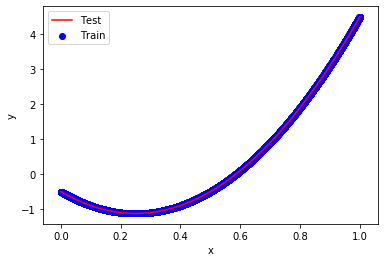

In [5]:
plt.scatter(x_train, y_train, label='Train', color='blue')
plt.plot(x_test, y_test, label='Test', color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()

# Define the Model

A basic, multilayer dense model with [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation functions is used. The output layer does not have activation function in order to produce continous output values.

In [0]:
model = Sequential()
model.add(Dense(units=200, input_dim=1))
model.add(Activation('relu'))
model.add(Dense(units=20))
model.add(Activation('relu'))
model.add(Dense(units=1))

# Training

In [7]:
model.compile(loss='mean_squared_error', optimizer=Adam())
history = model.fit(x_train, y_train, batch_size=50, epochs=10, verbose=1, validation_data=(x_test, y_test))

Train on 10000 samples, validate on 100 samples
Epoch 1/10
10000/10000 [==============================] - 1s 100us/sample - loss: 1.1578 - val_loss: 0.0894
Epoch 2/10
10000/10000 [==============================] - 0s 39us/sample - loss: 0.0277 - val_loss: 0.0121
Epoch 3/10
10000/10000 [==============================] - 0s 39us/sample - loss: 0.0064 - val_loss: 0.0047
Epoch 4/10
10000/10000 [==============================] - 0s 39us/sample - loss: 0.0024 - val_loss: 0.0019
Epoch 5/10
10000/10000 [==============================] - 0s 40us/sample - loss: 0.0011 - val_loss: 8.7525e-04
Epoch 6/10
10000/10000 [==============================] - 0s 39us/sample - loss: 5.0923e-04 - val_loss: 5.1909e-04
Epoch 7/10
10000/10000 [==============================] - 0s 42us/sample - loss: 2.7013e-04 - val_loss: 2.6015e-04
Epoch 8/10
10000/10000 [==============================] - 0s 37us/sample - loss: 1.6617e-04 - val_loss: 1.6942e-04
Epoch 9/10
10000/10000 [==============================] - 0s 38us/s

# Model Loss

The loss is the difference between expected output (y_train) and model output. Lower loss values are better.

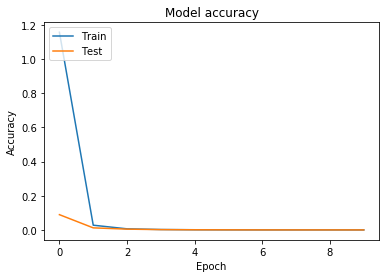

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Predictions

In [0]:
y_predictions = model.predict(x_test, batch_size=1)

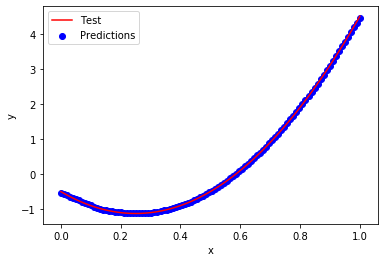

In [10]:
plt.scatter(x_test, y_predictions, label='Predictions', color='blue')
plt.plot(x_test, y_test, label='Test', color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()

# Save the Model

The model structure and trained weights/biases can be saved to files. These can be reloaded later for prediction.

In [0]:
model_structure = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_structure)
model.save_weights("weights.h5")

# Restore Trained Model

In [0]:
with open('model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
restored_model = model_from_json(loaded_model_json)
restored_model.load_weights("weights.h5")

# Predictions

Make predictions using the restored model. It should produce the same results as the original model.

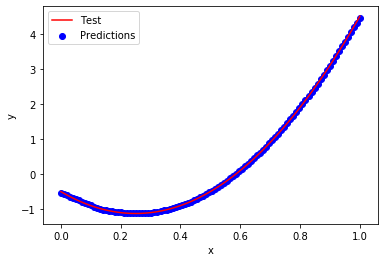

In [13]:
y_predictions = restored_model.predict(x_test, batch_size=1)

plt.scatter(x_test, y_predictions, label='Predictions', color='blue')
plt.plot(x_test, y_test, label='Test', color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()